In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
x = pd.read_csv('../Data/Intermediate_results/X_opening.csv')

In [7]:
x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2.783919e+09,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0
1,300000000.0,9.634204e+08,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0
2,300000000.0,8.796209e+08,2015.0,2.35,148.0,11700.0,245000000.0,6.8,70403148.0,3929.0
3,275000000.0,1.084439e+09,2012.0,2.35,164.0,106759.0,250000000.0,8.5,160887295.0,4404.0
4,275000000.0,2.600021e+08,2013.0,2.35,150.0,45757.0,215000000.0,6.5,29210849.0,3904.0


In [8]:
y = x['worldwide_gross']
x = x.drop('worldwide_gross', axis = 1)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [10]:
print(len(x))
print(len(x_train))
print(len(x_test))

2221
1665
556


In [11]:
from sklearn.linear_model import Lasso

model = Lasso()

In [12]:
model.fit(x_train, y_train)

Lasso()

In [13]:
predicted = model.predict(x_test)

In [14]:
model.score(x_test, y_test)

0.7404312700427693

<AxesSubplot:>

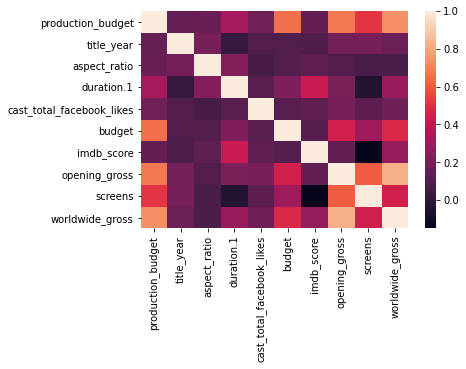

In [15]:
Z = pd.concat([x,y], axis = 1)
sns.heatmap(Z.corr())